# California Crime and Law Enforcement Data Analysis

This project aims to analyze the **law enforcement employment rates, crime rates, and their relation** in the **cities of California** in **2015**. 

In this project I have utilized datasets from Kaggle:
- [Kaggle Datasets](https://www.kaggle.com/datasets/fbi-us/california-crime?select=ca_law_enforcement_by_city.csv)

The original datasets can be found in the [FBI UCR Website](https://ucr.fbi.gov/crime-in-the-u.s/2015/crime-in-the-u.s.-2015).

### Aim & Outcomes

1. Which California agencies, cities, counties have a higher number of reported crimes?
2. What are the most frequent crimes in the most dangerous agency, city, & county?
3. What are the most common types of crimes in California? 
4. How does the number of law enforcement officers compare to the crime rates of a particular area? Is the ratio similar throughout the state, or do certain campuses, counties, or cities have a differing rate?
5. What other factors may affect crime rates of a particular area? How significant are their impacts?

### Table of Contents

1. **Part 1:** Installing & Importing Necessary Python Libraries
2. **Part 2:** Reading & Exploring Data
3. **Part 3:** Data Cleaning + Preprocessing
4. **Part 4:** Data Analysis + Visualization
5. **2015 California Crime and Law Enforcement Data Analysis Final Results**

## **Part 1:** Installing & Importing Necessary Python Libraries ##

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import StrMethodFormatter

In [3]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')


'en_US.UTF-8'

## **Part 2:** Reading & Exploring Data ##

In this exploration, there are two main categories of data: **law enforcement employment rates** and **crime rates**.

The **law enforcement employment rates** data are explored below: 

In [4]:
law_agency = pd.read_csv('ca_law_enforcement_by_agency.csv',thousands=",")
law_city = pd.read_csv('ca_law_enforcement_by_city.csv',thousands=",")
law_county = pd.read_csv('ca_law_enforcement_by_county.csv',thousands=",")

In [5]:
law_agency.head()

,State/Tribal/Other,Agency,Unit/Office,Total law\renforcement\remployees,Total\rofficers,Total\rcivilians
0,State Agencies,Atascadero State Hospital,NaN,139,128,11
1,State Agencies,California State Fair,NaN,3,3,0
2,State Agencies,Coalinga State Hospital,NaN,228,210,18
3,State Agencies,Department of Parks and Recreation,Capital,560,530,30
4,State Agencies,Fairview Developmental Center,NaN,17,14,3


In [6]:
law_agency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State/Tribal/Other               26 non-null     object
 1   Agency                           26 non-null     object
 2   Unit/Office                      3 non-null      object
employees  26 non-null     int64 
officers                   26 non-null     int64 
civilians                  26 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.3+ KB


In [7]:
law_city.head()

,City,Population,Total law\renforcement\remployees,Total \rofficers,Total \rcivilians
0,Alameda,78613,112,83,29
1,Albany,19723,30,23,7
2,Alhambra,86175,128,85,43
3,Alturas,2566,6,5,1
4,Anaheim,349471,577,399,178


In [8]:
law_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   City                             333 non-null    object
 1   Population                       333 non-null    int64 
employees  333 non-null    int64 
officers                  333 non-null    int64 
civilians                 333 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 13.1+ KB


In [9]:
law_county.head()

,Metropolitan/Nonmetropolitan,County,Total law\renforcement\remployees,Total\rofficers,Total\rcivilians
0,Metropolitan Counties,Alameda,1560,978,582
1,Metropolitan Counties,Butte,288,101,187
2,Metropolitan Counties,Contra Costa,936,610,326
3,Metropolitan Counties,El Dorado,349,164,185
4,Metropolitan Counties,Fresno,1043,406,637


In [10]:
law_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Metropolitan/Nonmetropolitan     58 non-null     object
 1   County                           58 non-null     object
employees  58 non-null     int64 
officers                   58 non-null     int64 
civilians                  58 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.4+ KB


The **crime rates** data are explored below with the same process: 

In [11]:
crime_agency = pd.read_csv('ca_offenses_by_agency.csv',thousands=",")
crime_city = pd.read_csv('ca_offenses_by_city.csv',thousands=",")
crime_county = pd.read_csv('ca_offenses_by_county.csv',thousands=",")

In [12]:
crime_agency.head()

,State/Tribal/Other,Agency,Unit/Office,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,State Agencies,Atascadero State Hospital4,NaN,321.0,0.0,0.0,NaN,0.0,321.0,4.0,0.0,2.0,2.0,0.0
1,State Agencies,California State Fair4,NaN,12.0,0.0,0.0,NaN,0.0,12.0,79.0,21.0,56.0,2.0,1.0
2,State Agencies,Coalinga State Hospital,NaN,149.0,0.0,0.0,NaN,0.0,149.0,3.0,1.0,2.0,0.0,0.0
3,State Agencies,Department of Parks and Recreation,Angeles,2.0,0.0,0.0,NaN,1.0,1.0,26.0,8.0,18.0,0.0,0.0
4,State Agencies,Department of Parks and Recreation,Bay Area,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [13]:
crime_agency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State/Tribal/Other                    169 non-null    object 
 1   Agency                                166 non-null    object 
 2   Unit/Office                           141 non-null    object 
 3   Violent crime                         166 non-null    float64
 4   Murder and nonnegligent manslaughter  166 non-null    float64
 5   Rape (revised definition)             166 non-null    float64
 6   Rape (legacy definition)              0 non-null      float64
 7   Robbery                               166 non-null    float64
 8   Aggravated assault                    166 non-null    float64
 9   Property crime                        166 non-null    float64
 10  Burglary                              166 non-null    float64
 11  Larceny-theft      

In [14]:
crime_city.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape (legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Adelanto,33005,212,2,14,NaN,48,148,808,434,254,120,24
1,Agoura Hills,20970,15,0,1,NaN,6,8,310,82,217,11,0
2,Alameda,78613,148,2,7,NaN,61,78,1819,228,1245,346,18
3,Albany,19723,34,1,6,NaN,16,11,605,95,447,63,0
4,Alhambra3,86175,168,1,13,NaN,74,80,1929,305,1413,211,6


In [15]:
crime_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   City                                  460 non-null    object 
 1   Population                            460 non-null    int64  
 2   Violent crime                         460 non-null    int64  
 3   Murder and nonnegligent manslaughter  460 non-null    int64  
 4   Rape (revised definition)             460 non-null    int64  
 5   Rape (legacy definition)              0 non-null      float64
 6   Robbery                               460 non-null    int64  
 7   Aggravated assault                    460 non-null    int64  
 8   Property crime                        460 non-null    int64  
 9   Burglary                              460 non-null    int64  
 10  Larceny-theft                         460 non-null    int64  
 11  Motor vehicle theft

In [16]:
crime_county.head()

,Metropolitan/Nonmetropolitan,County,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition),Rape(legacy definition),Robbery,Aggravated assault,Property crime,Burglary,Larceny-theft,Motor vehicle theft,Arson
0,Metropolitan Counties,Alameda,510.0,6.0,13.0,NaN,177.0,314.0,2077.0,463.0,985.0,629.0,11.0
1,Metropolitan Counties,Butte3,155.0,4.0,20.0,NaN,14.0,117.0,1422.0,708.0,693.0,21.0,0.0
2,Metropolitan Counties,Contra Costa,426.0,14.0,24.0,NaN,153.0,235.0,2013.0,660.0,1332.0,21.0,18.0
3,Metropolitan Counties,El Dorado3,252.0,9.0,46.0,NaN,32.0,165.0,2031.0,577.0,1412.0,42.0,4.0
4,Metropolitan Counties,Fresno,962.0,8.0,32.0,NaN,112.0,810.0,3810.0,1398.0,1838.0,574.0,145.0


In [17]:
crime_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592 entries, 0 to 2591
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Metropolitan/Nonmetropolitan          57 non-null     object 
 1   County                                57 non-null     object 
 2   Violent crime                         57 non-null     float64
 3   Murder and nonnegligent manslaughter  57 non-null     float64
 4   Rape (revised definition)             57 non-null     float64
 5   Rape(legacy definition)               0 non-null      float64
 6   Robbery                               57 non-null     float64
 7   Aggravated assault                    57 non-null     float64
 8   Property crime                        57 non-null     float64
 9   Burglary                              57 non-null     float64
 10  Larceny-theft                         57 non-null     float64
 11  Motor vehicle the

## **Part 3:** Data Cleaning + Preprocessing ##

Columns in each dataset will be removed if, for the following three reasons: **(1) unnecessary for analysis**,  **(2) does not represent data i.e. labels**, **(3) if most entries are null**.

The **law enforcement employment rates** data are cleaned below: 


In [18]:
law_agency.columns

Index(['State/Tribal/Other ', 'Agency', 'Unit/Office',
       'Total law\renforcement\remployees', 'Total\rofficers',
       'Total\rcivilians'],
      dtype='object')

In [19]:
pd.DataFrame(law_agency.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
State/Tribal/Other,0
Agency,0
Unit/Office,23
Total law\renforcement\remployees,0
Total\rofficers,0
Total\rcivilians,0


Since 23/26 (88%) of the dataset is null, the "Unit/Office" column will be removed. 

In [20]:
law_agency = law_agency.drop('Unit/Office', axis=1)

In [21]:
law_agency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   State/Tribal/Other               26 non-null     object
 1   Agency                           26 non-null     object
employees  26 non-null     int64 
officers                   26 non-null     int64 
civilians                  26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ KB


In [22]:
law_city.columns

Index(['City', 'Population', 'Total law\renforcement\remployees',
       'Total \rofficers', 'Total \rcivilians'],
      dtype='object')

In [23]:
pd.DataFrame(law_city.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
City,0
Population,0
Total law\renforcement\remployees,0
Total \rofficers,0
Total \rcivilians,0


In [24]:
law_county.columns

Index(['Metropolitan/Nonmetropolitan', 'County',
       'Total law\renforcement\remployees', 'Total\rofficers',
       'Total\rcivilians'],
      dtype='object')

In [25]:
pd.DataFrame(law_county.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
Metropolitan/Nonmetropolitan,0
County,0
Total law\renforcement\remployees,0
Total\rofficers,0
Total\rcivilians,0


The same process of cleaning is repeated for the **crime rates** data below: 

In [26]:
crime_agency.columns

Index(['State/Tribal/Other', 'Agency', 'Unit/Office', 'Violent crime',
       'Murder and nonnegligent manslaughter', 'Rape (revised definition)',
       'Rape (legacy definition)', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft',
       'Arson'],
      dtype='object')

In [27]:
pd.DataFrame(crime_agency.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
State/Tribal/Other,64
Agency,67
Unit/Office,92
Violent crime,67
Murder and nonnegligent manslaughter,67
Rape (revised definition),67
Rape (legacy definition),233
Robbery,67
Aggravated assault,67


In [28]:
crime_agency = crime_agency.drop('Rape (legacy definition)', axis=1)

In [29]:
crime_agency = crime_agency.dropna()

In [30]:
pd.DataFrame(crime_agency.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
State/Tribal/Other,0
Agency,0
Unit/Office,0
Violent crime,0
Murder and nonnegligent manslaughter,0
Rape (revised definition),0
Robbery,0
Aggravated assault,0
Property crime,0


In [31]:
crime_city.columns

Index(['City', 'Population', 'Violent crime',
       'Murder and nonnegligent manslaughter', 'Rape (revised definition)',
       'Rape (legacy definition)', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft',
       'Arson'],
      dtype='object')

In [32]:
pd.DataFrame(crime_city.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
City,0
Population,0
Violent crime,0
Murder and nonnegligent manslaughter,0
Rape (revised definition),0
Rape (legacy definition),460
Robbery,0
Aggravated assault,0
Property crime,0


In [33]:
crime_city = crime_city.drop('Rape (legacy definition)', axis=1)

In [34]:
pd.DataFrame(crime_city.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
City,0
Population,0
Violent crime,0
Murder and nonnegligent manslaughter,0
Rape (revised definition),0
Robbery,0
Aggravated assault,0
Property crime,0
Burglary,0


In [35]:
crime_county.columns

Index(['Metropolitan/Nonmetropolitan', 'County', 'Violent crime',
       'Murder and nonnegligent manslaughter', 'Rape (revised definition)',
       'Rape(legacy definition)', 'Robbery', 'Aggravated assault',
       'Property crime', 'Burglary', 'Larceny-theft', 'Motor vehicle theft',
       'Arson'],
      dtype='object')

In [36]:
pd.DataFrame(crime_county.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
Metropolitan/Nonmetropolitan,2535
County,2535
Violent crime,2535
Murder and nonnegligent manslaughter,2535
Rape (revised definition),2535
Rape(legacy definition),2592
Robbery,2535
Aggravated assault,2535
Property crime,2535


In [37]:
crime_county = crime_county.drop('Rape(legacy definition)', axis=1)

In [38]:
crime_county = crime_county.dropna()

In [39]:
pd.DataFrame(crime_county.isnull().sum(), columns=['Missing Values']).rename_axis('Feature')

,Missing Values
Feature,
Metropolitan/Nonmetropolitan,0
County,0
Violent crime,0
Murder and nonnegligent manslaughter,0
Rape (revised definition),0
Robbery,0
Aggravated assault,0
Property crime,0
Burglary,0


The data cleaning process is now complete. Hence, data analysis can already be started. 

## **Part 4:** Data Analysis + Visualization ##

 #### **Outcome 1**: Which California agencies, cities, counties have a higher number of reported crimes?


##### Outcome 1.1: California agencies with highest number of reported crimes

In [40]:
exclude_columns = ['State/Tribal/Other', 'Agency', 'Unit/Office']
def combine_columns_except_excluded(row):
    return sum(float(row[col]) for col in row.index if col not in exclude_columns)
crime_agency['Reported Cases'] = crime_agency.apply(combine_columns_except_excluded, axis=1)
print(crime_agency)

    State/Tribal/Other                              Agency        Unit/Office  \
3       State Agencies  Department of Parks and Recreation            Angeles   
4       State Agencies  Department of Parks and Recreation           Bay Area   
5       State Agencies  Department of Parks and Recreation  Calaveras County4   
6       State Agencies  Department of Parks and Recreation            Capital   
7       State Agencies  Department of Parks and Recreation      Channel Coast   
..                 ...                                 ...                ...   
164     Other Agencies              Union Pacific Railroad    Trinity County4   
165     Other Agencies              Union Pacific Railroad     Tulare County4   
166     Other Agencies              Union Pacific Railroad    Ventura County4   
167     Other Agencies              Union Pacific Railroad       Yolo County4   
168     Other Agencies              Union Pacific Railroad       Yuba County4   

     Violent crime  Murder 

In [41]:
top_agency = crime_agency.groupby('Agency')['Reported Cases'].sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True)
top_agency.index = top_agency.index+1
top_agency.columns = ['Agency', 'Total Reported Cases']
top_agency.style.bar()

,Agency,Total Reported Cases
1,Highway Patrol,20410.000000
2,San Francisco Bay Area Rapid Transit,2825.000000
3,Department of Parks and Recreation,1250.000000
4,Union Pacific Railroad,1110.000000
5,East Bay Regional Parks,718.000000


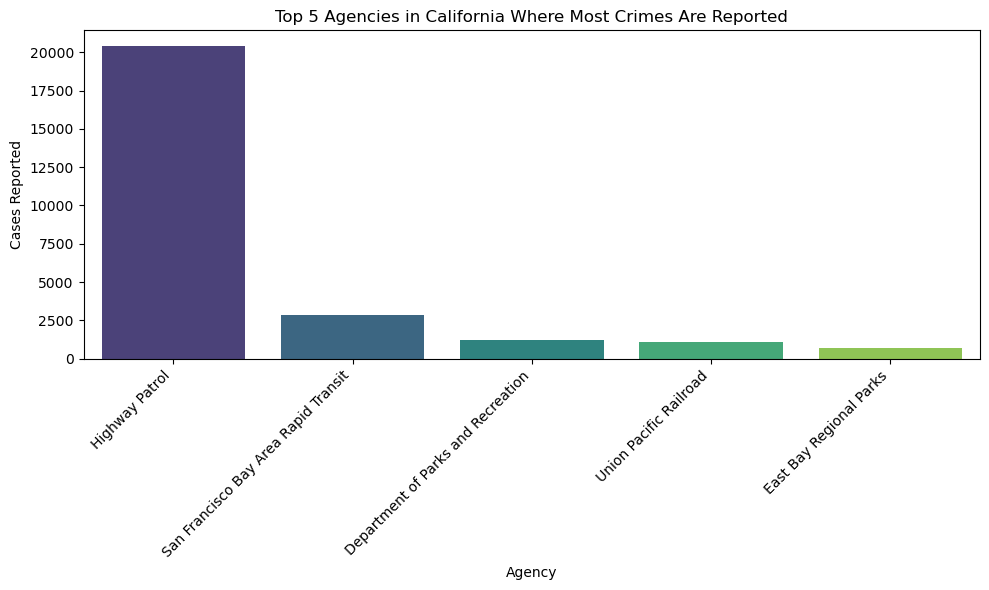

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_agency, x='Agency', y='Total Reported Cases', palette='viridis')

plt.xlabel('Agency')
plt.ylabel('Cases Reported')
plt.title('Top 5 Agencies in California Where Most Crimes Are Reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

#### **Analysis shows that the agencies with highest number of reported crimes in California in 2015 are:**
1. Highway Patrol (total of 20410 reported crimes)
2. San Francisco Bay Area Rapid Transit (total of 2825 reported crimes)
3. Department of Parks and Recreation (total of 1250 reported crimes)
4. Union Pacific Railroad (total of 1110 reported crimes)
5. East Bay Regional Parks (total of 718 reported crimes)


##### Outcome 1.2: California cities with highest number of reported crimes

In [43]:
exclude_columns = ['City','Population']
def combine_columns_except_excluded(row):
    return sum(float(row[col]) for col in row.index if col not in exclude_columns)
crime_city['Reported Cases'] = crime_city.apply(combine_columns_except_excluded, axis=1)
print(crime_city)

             City  Population  Violent crime  \
0        Adelanto       33005            212   
1    Agoura Hills       20970             15   
2         Alameda       78613            148   
3          Albany       19723             34   
4       Alhambra3       86175            168   
..            ...         ...            ...   
455   Yountville3        3030              7   
456         Yreka        7507             47   
457     Yuba City       65974            216   
458       Yucaipa       53498             94   
459  Yucca Valley       21672            151   

     Murder and nonnegligent manslaughter  Rape (revised definition)  Robbery  \
0                                       2                         14       48   
1                                       0                          1        6   
2                                       2                          7       61   
3                                       1                          6       16   
4                 

In [44]:
top_city = crime_city.groupby('City')['Reported Cases'].sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True).head(10)
top_city.index = top_city.index+1
top_city.columns = ['City', 'Total Reported Cases']
top_city.style.bar()

,City,Total Reported Cases
1,Los Angeles,238449.000000
2,San Francisco,119730.000000
3,San Diego,69654.000000
4,Oakland,61417.000000
5,San Jose,56963.000000
6,Fresno,49209.000000
7,Sacramento,40364.000000
8,Bakersfield,35077.000000
9,Stockton,34343.000000
10,Long Beach,34275.000000


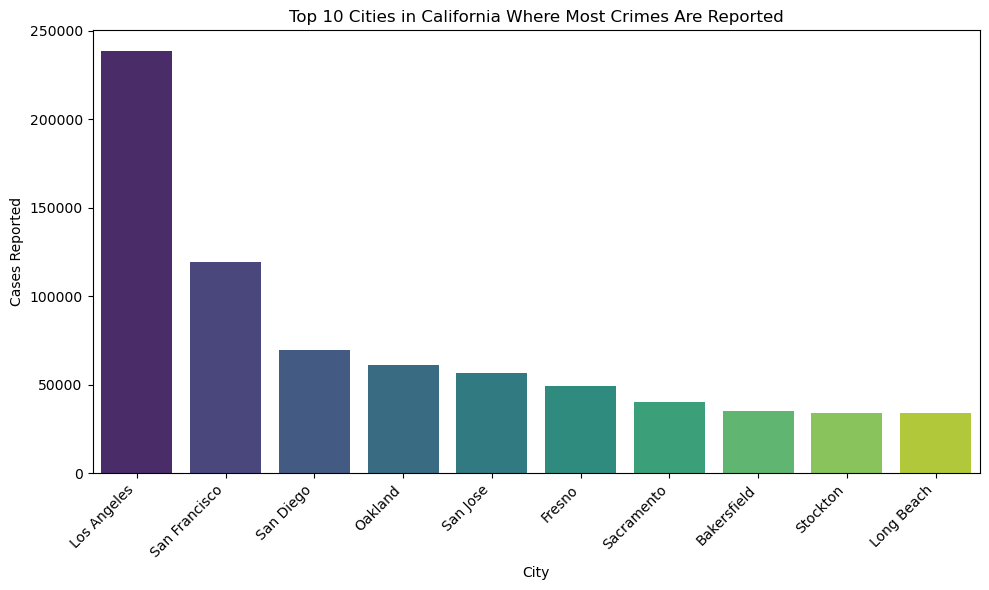

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_city, x='City', y='Total Reported Cases', palette='viridis')

plt.xlabel('City')
plt.ylabel('Cases Reported')
plt.title('Top 10 Cities in California Where Most Crimes Are Reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

#### **Analysis shows that the cities with highest number of reported crimes in California in 2015 are:**
1. Los Angeles (total of 238,449 reported crimes)
2. San Francisco (total of 119,730 reported crimes)
3. San Diego (total of 69,654 reported crimes)
4. Oakland (total of 61,417 reported crimes)
5. San Jose (total of 56,963 reported crimes)
6. Fresno (total of 49,209 reported crimes)
7. Sacramento (total of 40,364 reported crimes)
8. Bakersfield (total of 35,077 reported crimes)
9. Stockton (total of 34,343 reported crimes)
10. Long Beach (total of 34,275 reported crimes)

##### Outcome 1.3: California counties with highest number of reported crimes

In [46]:
exclude_columns = ['Metropolitan/Nonmetropolitan', 'County']
def combine_columns_except_excluded(row):
    return sum(float(row[col]) for col in row.index if col not in exclude_columns)
crime_county['Reported Cases'] = crime_county.apply(combine_columns_except_excluded, axis=1)
print(crime_county)

   Metropolitan/Nonmetropolitan            County  Violent crime  \
0         Metropolitan Counties           Alameda          510.0   
1         Metropolitan Counties            Butte3          155.0   
2         Metropolitan Counties      Contra Costa          426.0   
3         Metropolitan Counties        El Dorado3          252.0   
4         Metropolitan Counties            Fresno          962.0   
5         Metropolitan Counties         Imperial3          219.0   
6         Metropolitan Counties              Kern         2235.0   
7         Metropolitan Counties            Kings3          122.0   
8         Metropolitan Counties       Los Angeles         5173.0   
9         Metropolitan Counties            Madera          334.0   
10        Metropolitan Counties             Marin           95.0   
11        Metropolitan Counties            Merced          432.0   
12        Metropolitan Counties          Monterey          244.0   
13        Metropolitan Counties              Nap

In [47]:
top_county = crime_county.groupby('County')['Reported Cases'].sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True).head(10)
top_county.index = top_county.index+1
top_county.columns = ['County', 'Total Reported Cases']
top_county.style.bar()

,County,Total Reported Cases
1,Los Angeles,43163.000000
2,Sacramento,28593.000000
3,Kern,24576.000000
4,Riverside,17148.000000
5,San Bernardino,12956.000000
6,San Diego,11931.000000
7,Fresno,9689.000000
8,San Joaquin,8848.000000
9,San Mateo,6267.000000
10,Alameda,5185.000000


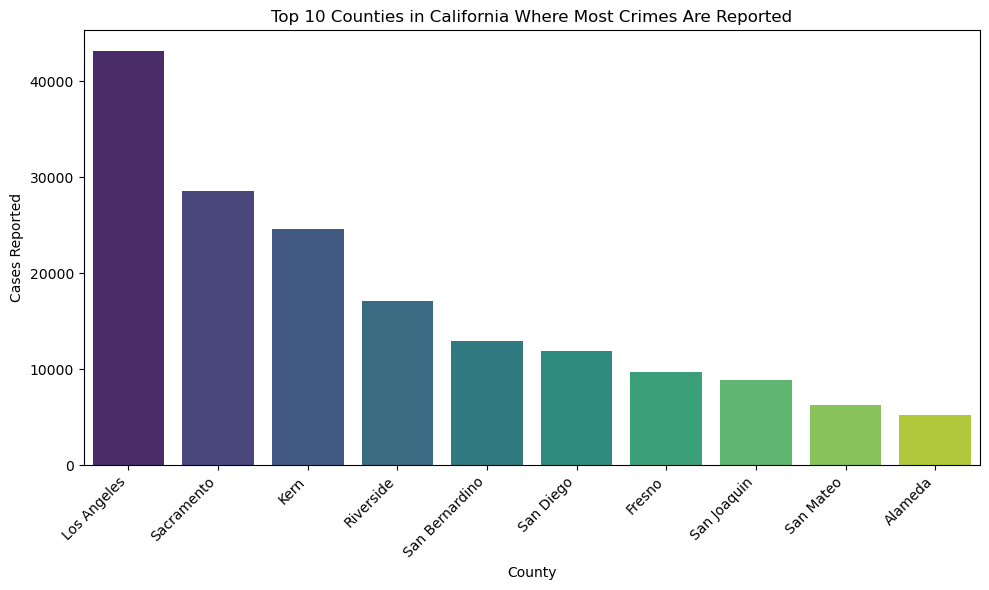

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_county, x='County', y='Total Reported Cases', palette='viridis')

plt.xlabel('County')
plt.ylabel('Cases Reported')
plt.title('Top 10 Counties in California Where Most Crimes Are Reported')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

#### **Analysis shows that the counties with highest number of reported crimes in California in 2015 are:**
1. Los Angeles (total of 43,163 reported crimes)
2. Sacramento (total of 28,593 reported crimes)
3. Kern (total of 24,576 reported crimes)
4. Riverside (total of 17,148 reported crimes)
5. San Bernardino (total of 12,956 reported crimes)
6. San Diego (total of 11,931 reported crimes)
7. Fresno (total of 9,689 reported crimes)
8. San Joaquin (total of 8,848 reported crimes)
9. San Mateo (total of 6,267 reported crimes)
10. Alameda (total of 5,185 reported crimes)

 #### **Outcome 2**: What are the most frequent crimes in the most dangerous agency, city, & county?


##### Outcome 2.1: Most frequent crimes in the Most Dangerous Agency: Highway Patrol

In [49]:
frequent_agency = crime_agency.drop('Unit/Office', axis=1)
frequent_agency = frequent_agency.drop('State/Tribal/Other', axis=1)
frequent_agency = frequent_agency.groupby('Agency').sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True)
print(frequent_agency)

                                 Agency  Violent crime  \
0                        Highway Patrol          108.0   
1  San Francisco Bay Area Rapid Transit           99.0   
2    Department of Parks and Recreation           21.0   
3                Union Pacific Railroad            7.0   
4               East Bay Regional Parks           19.0   

   Murder and nonnegligent manslaughter  Rape (revised definition)  Robbery  \
0                                   0.0                        1.0      9.0   
1                                   0.0                        3.0     64.0   
2                                   0.0                        0.0      1.0   
3                                   0.0                        0.0      0.0   
4                                   2.0                        4.0      8.0   

   Aggravated assault  Property crime  Burglary  Larceny-theft  \
0                98.0         10097.0      27.0         1624.0   
1                32.0          1310.0       

In [50]:
top_crime = pd.DataFrame(frequent_agency)
# Extract the selected row and convert it into a new DataFrame
top_crime = pd.DataFrame(top_crime .iloc[0]).T # Number is interchangable for exploration of other agencies/cities/counties based on ranking i.e. 1,2,3,4
# Reset the index of the extracted DataFrame
top_crime.reset_index(drop=True, inplace=True)
# Drop unnecessary rows
top_crime = top_crime.drop('Agency', axis=1)
top_crime = top_crime.drop('Reported Cases', axis=1)
# Transpose
top_crime = top_crime.T.reset_index()
top_crime.columns = ['Crime in Highway Patrol','Reported Cases']
top_crime = top_crime.sort_values(by='Reported Cases', ascending=False,ignore_index=True)
top_crime.index = top_crime.index+1
top_crime.style.bar()

,Crime in Highway Patrol,Reported Cases
1,Property crime,10097.000000
2,Motor vehicle theft,8446.000000
3,Larceny-theft,1624.000000
4,Violent crime,108.000000
5,Aggravated assault,98.000000
6,Burglary,27.000000
7,Robbery,9.000000
8,Rape (revised definition),1.000000
9,Murder and nonnegligent manslaughter,0.000000
10,Arson,0.000000


##### Outcome 2.2: Most frequent crimes in the Most Dangerous City: Los Angeles

In [51]:
frequent_city = crime_city.groupby('City').sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True).head(10)
frequent_city = frequent_city.drop('Population', axis=1)
print(frequent_city)

            City  Violent crime  Murder and nonnegligent manslaughter  \
0    Los Angeles          25156                                   282   
1  San Francisco           6710                                    53   
2      San Diego           5582                                    37   
3        Oakland           6051                                    85   
4       San Jose           3400                                    30   
5         Fresno           2871                                    39   
6     Sacramento           3611                                    43   
7    Bakersfield           1810                                    22   
8       Stockton           4122                                    49   
9     Long Beach           2766                                    36   

   Rape (revised definition)  Robbery  Aggravated assault  Property crime  \
0                       2209     8952               13713           93503   
1                        344     3610     

In [52]:
top_crime = pd.DataFrame(frequent_city)
# Extract the selected row and convert it into a new DataFrame
top_crime = pd.DataFrame(top_crime .iloc[0]).T # Number is interchangable for exploration of other agencies/cities/counties based on ranking i.e. 1,2,3,4
# Reset the index of the extracted DataFrame
top_crime.reset_index(drop=True, inplace=True)
# Drop unnecessary rows
top_crime = top_crime.drop('City', axis=1)
top_crime = top_crime.drop('Reported Cases', axis=1)
# Transpose
top_crime = top_crime.T.reset_index()
top_crime.columns = ['Crime in Los Angeles (City)','Reported Cases']
top_crime = top_crime.sort_values(by='Reported Cases', ascending=False,ignore_index=True)
top_crime.index = top_crime.index+1
top_crime.style.bar()

,Crime in Los Angeles (City),Reported Cases
1,Property crime,93503
2,Larceny-theft,61191
3,Violent crime,25156
4,Burglary,16160
5,Motor vehicle theft,16152
6,Aggravated assault,13713
7,Robbery,8952
8,Rape (revised definition),2209
9,Arson,1131
10,Murder and nonnegligent manslaughter,282


##### Outcome 2.3: Most frequent crimes in the Most Dangerous County: Los Angeles

In [53]:
frequent_county = crime_county.drop('Metropolitan/Nonmetropolitan', axis=1)
frequent_county = frequent_county.groupby('County').sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True)
print(frequent_county)

              County  Violent crime  Murder and nonnegligent manslaughter  \
0        Los Angeles         5173.0                                  98.0   
1         Sacramento         3117.0                                  37.0   
2               Kern         2235.0                                  31.0   
3          Riverside          885.0                                  12.0   
4     San Bernardino          920.0                                  18.0   
5          San Diego         1161.0                                  10.0   
6             Fresno          962.0                                   8.0   
7        San Joaquin          845.0                                   5.0   
8          San Mateo          330.0                                   3.0   
9            Alameda          510.0                                   6.0   
10        Stanislaus          394.0                                  11.0   
11           Tulare4          383.0                                  23.0   

In [54]:
top_crime = pd.DataFrame(frequent_county)
# Extract the selected row and convert it into a new DataFrame
top_crime = pd.DataFrame(top_crime .iloc[0]).T # Number is interchangable for exploration of other agencies/cities/counties based on ranking i.e. 1,2,3,4
# Reset the index of the extracted DataFrame
top_crime.reset_index(drop=True, inplace=True)
# Drop unnecessary rows
top_crime = top_crime.drop('County', axis=1)
top_crime = top_crime.drop('Reported Cases', axis=1)
# Transpose
top_crime = top_crime.T.reset_index()
top_crime.columns = ['Crime in Los Angeles (County)','Reported Cases']
top_crime = top_crime.sort_values(by='Reported Cases', ascending=False,ignore_index=True)
top_crime.index = top_crime.index+1
top_crime.style.bar()

,Crime in Los Angeles (County),Reported Cases
1,Property crime,16301.000000
2,Larceny-theft,8359.000000
3,Violent crime,5173.000000
4,Motor vehicle theft,4203.000000
5,Burglary,3739.000000
6,Aggravated assault,3559.000000
7,Robbery,1212.000000
8,Rape (revised definition),304.000000
9,Arson,215.000000
10,Murder and nonnegligent manslaughter,98.000000


 #### **Outcome 3**: What are the most common types of crimes in California? 

For this exploration, we will be measuring the crime counts depicted in the city level/dataset as it presents the most in-depth look at crime rates in comparison to the agency and county datasets as crime per city is measured. 

In [55]:
california_crime = pd.DataFrame(crime_city[['Property crime', 'Larceny-theft', 'Violent crime', 'Burglary', 'Motor vehicle theft', 'Aggravated assault', 'Robbery',  'Rape (revised definition)', 'Arson', 'Murder and nonnegligent manslaughter']].sum())
california_crime.reset_index(inplace=True)
california_crime.index = california_crime.index+1
california_crime.columns = ['Crime in California','Total Reported Cases']
california_crime.style.bar()

,Crime in California,Total Reported Cases
1,Property crime,882378
2,Larceny-theft,575940
3,Violent crime,137347
4,Burglary,162229
5,Motor vehicle theft,144209
6,Aggravated assault,78300
7,Robbery,46918
8,Rape (revised definition),10673
9,Arson,6103
10,Murder and nonnegligent manslaughter,1456


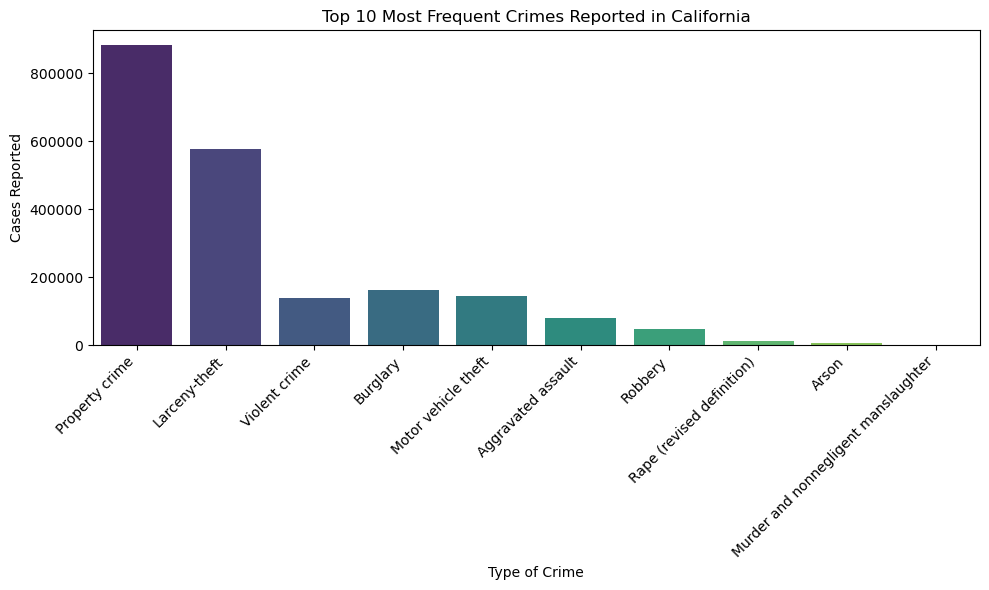

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(data=california_crime, x='Crime in California', y='Total Reported Cases', palette='viridis')

plt.xlabel('Type of Crime')
plt.ylabel('Cases Reported')
plt.title('Top 10 Most Frequent Crimes Reported in California')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

 #### **Outcome 4**: How does the number of law enforcement officers compare to the crime rates of a particular area? Is the ratio similar throughout the state, or do some have a differing rate?


##### Outcome 4.1: in Agencies

In [88]:
compare_data = law_agency.merge(crime_agency, on='Agency')
compare_data['Crime to Law Enforcement Ratio'] = compare_data['Total law\renforcement\remployees']/compare_data['Reported Cases']
compare_data.replace([np.inf, -np.inf], 0, inplace=True)
compare_data = compare_data.groupby('Agency')['Crime to Law Enforcement Ratio'].sum().reset_index().sort_values(by='Crime to Law Enforcement Ratio',ascending=False,ignore_index=True)
compare_data.index = compare_data.index+1
compare_data.style.bar()

,Agency,Crime to Law Enforcement Ratio
1,Department of Parks and Recreation,1426.402700
2,San Francisco Bay Area Rapid Transit,1.355741
3,East Bay Regional Parks,0.461700


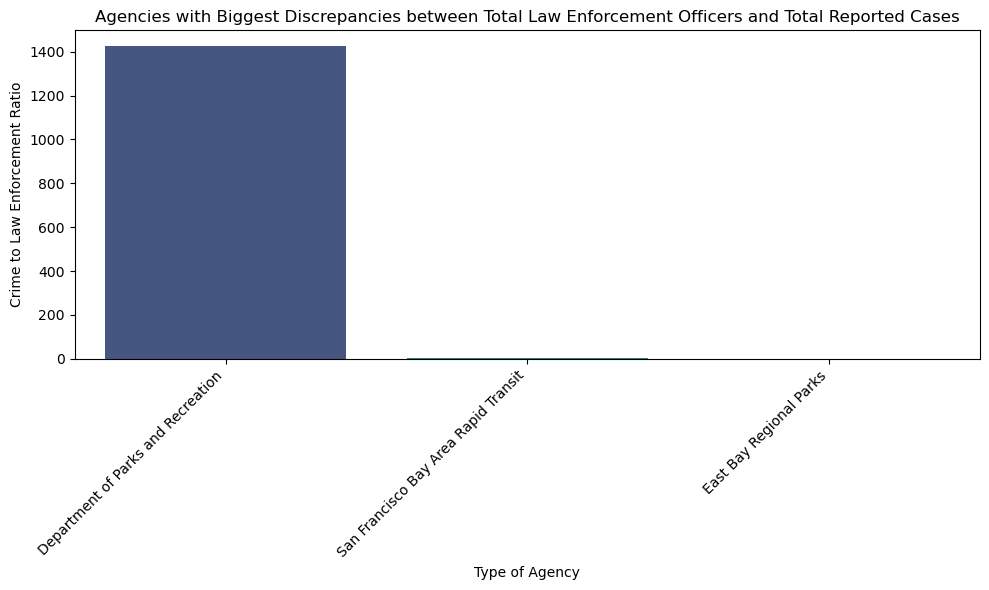

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=compare_data, x='Agency', y='Crime to Law Enforcement Ratio', palette='viridis')

plt.xlabel('Type of Agency')
plt.ylabel('Crime to Law Enforcement Ratio')
plt.title('Agencies in California with Biggest Discrepancies between Total Law Enforcement Officers and Total Reported Cases')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

Based on the information above, the Department of Parks and Recreation Agencies have the biggest Law Enforcement Officers to Total Reported Cases discrepancy. For every 1 officer, around 1426 cases are reported. This shows the severe lack of officers in the agency's jurisdiction, as the ratio suggests understaffing in comparison to the high crime rate in the area. Other agencies such as SF Bay Area Rapid Transit and East Bay Regional Parks have much lower ratios, showing that they are well-staffed in comparison to the crime rate in their jurisdiction. 

##### Outcome 4.2: in Cities

In [89]:
compare_data = law_city.merge(crime_city, on='City')
compare_data['Crime to Law Enforcement Ratio'] = compare_data['Total law\renforcement\remployees']/compare_data['Reported Cases']
compare_data.replace([np.inf, -np.inf], 0, inplace=True)
compare_data = compare_data.groupby('City')['Crime to Law Enforcement Ratio'].sum().reset_index().sort_values(by='Crime to Law Enforcement Ratio',ascending=False,ignore_index=True).head(10)
compare_data.index = compare_data.index+1
compare_data.style.bar()

,City,Crime to Law Enforcement Ratio
1,Atherton,0.145251
2,Belvedere,0.137931
3,Hillsborough,0.122047
4,Ross,0.102564
5,Taft,0.102302
6,Carmel,0.100806
7,Palos Verdes Estates,0.098870
8,Truckee,0.094183
9,Brisbane,0.094059
10,St. Helena,0.084158


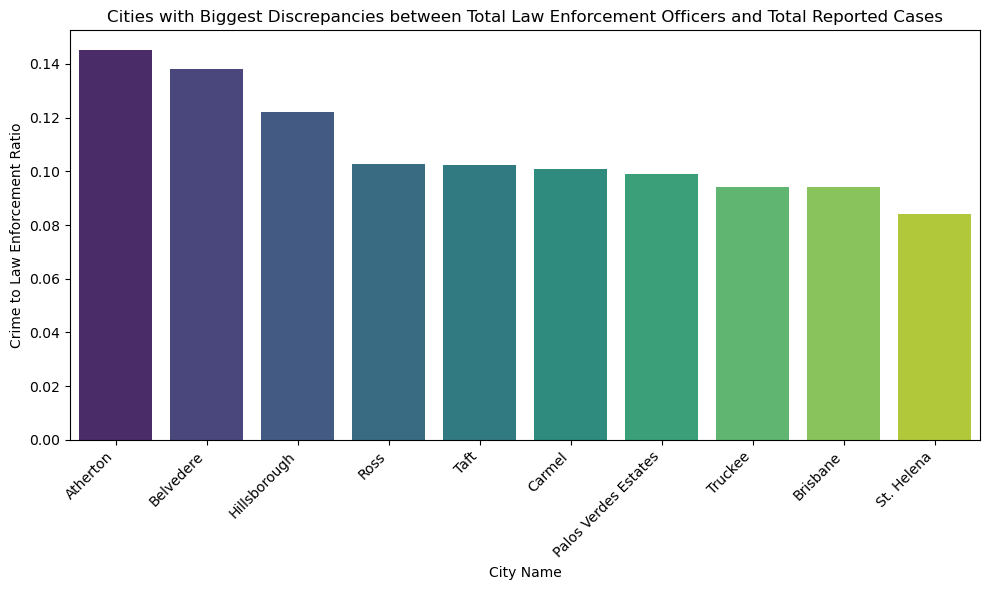

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(data=compare_data, x='City', y='Crime to Law Enforcement Ratio', palette='viridis')

plt.xlabel('City Name')
plt.ylabel('Crime to Law Enforcement Ratio')
plt.title('Cities in California with Biggest Discrepancies between Total Law Enforcement Officers and Total Reported Cases')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

#### **Analysis shows that the cities in California with the highest ratio of law enforcement officers to total reported cases in 2015 are:**
1. Atherton (estimate of 0.145 cases reported for every law enforcement officer)
2. Belvedere (estimate of 0.138 cases reported for every law enforcement officer)
3. Hillsborough (estimate of 0.122 cases reported for every law enforcement officer)
4. Ross (estimate of 0.103 cases reported for every law enforcement officer)
5. Taft (estimate of 0.100 cases reported for every law enforcement officer)
6. Carmel (estimate of 0.101 cases reported for every law enforcement officer)
7. Palos Verdes Estates (estimate of 0.099 cases reported for every law enforcement officer)
8. Truckee (estimate of 0.0941 cases reported for every law enforcement officer)
9. Brisbane (estimate of 0.0940 cases reported for every law enforcement officer)
10. St. Helena (estimate of 0.084 cases reported for every law enforcement officer)

It is interesting to see how in comparison to the agency perspective, the discrepancy is non-existent when law enforcement officers is evaluated in the city perspective. In the top ten, no cities have a ratio bigger than one, meaning there are more law enforcement officers than there are reported cases. This indicates competency, good staffing, and overall safety. For every case reported, there is more than one officer capable of handling it. 

##### Outcome 4.3: in Counties

In [90]:
compare_data = law_county.merge(crime_county, on='County')
compare_data['Crime to Law Enforcement Ratio'] = compare_data['Total law\renforcement\remployees']/compare_data['Reported Cases']
compare_data.replace([np.inf, -np.inf], 0, inplace=True)
compare_data = compare_data.groupby('County')['Crime to Law Enforcement Ratio'].sum().reset_index().sort_values(by='Crime to Law Enforcement Ratio',ascending=False,ignore_index=True).head(10)
compare_data.index = compare_data.index+1
compare_data.style.bar()

,County,Crime to Law Enforcement Ratio
1,Orange,1.214021
2,Ventura,0.605558
3,Santa Clara,0.506755
4,Solano,0.472031
5,Los Angeles,0.384172
6,San Diego,0.345906
7,Yolo,0.328321
8,Alameda,0.300868
9,Siskiyou,0.251269
10,San Bernardino,0.250617


#### **Analysis shows that the counties in California with the highest ratio of law enforcement officers to total reported cases in 2015 are:**
1. Orange (estimate of 1.214 cases reported for every law enforcement officer)
2. Ventura (estimate of 0.606 cases reported for every law enforcement officer)
3. Santa Clara (estimate of 0.507 cases reported for every law enforcement officer)
4. Solano (estimate of 0.472 cases reported for every law enforcement officer)
5. Los Angeles (estimate of 0.384 cases reported for every law enforcement officer)
6. San Diego (estimate of 0.346 cases reported for every law enforcement officer)
7. Yolo (estimate of 0.328 cases reported for every law enforcement officer)
8. Alameda (estimate of 0.301 cases reported for every law enforcement officer)
9. Siskiyou (estimate of 0.2512 cases reported for every law enforcement officer)
10. San Bernardino (estimate of 0.2506 cases reported for every law enforcement officer)

Similar to the city's analysis, the discrepancy is non-existent when law enforcement officers is evaluated in the county perspective. In the top ten, only the top county Orange have a ratio bigger than one, meaning there are less total law enforcement officers than there are reported cases. The rest of the counties have more than enough law enforcement officers to handle their respective reported crime in the area. 

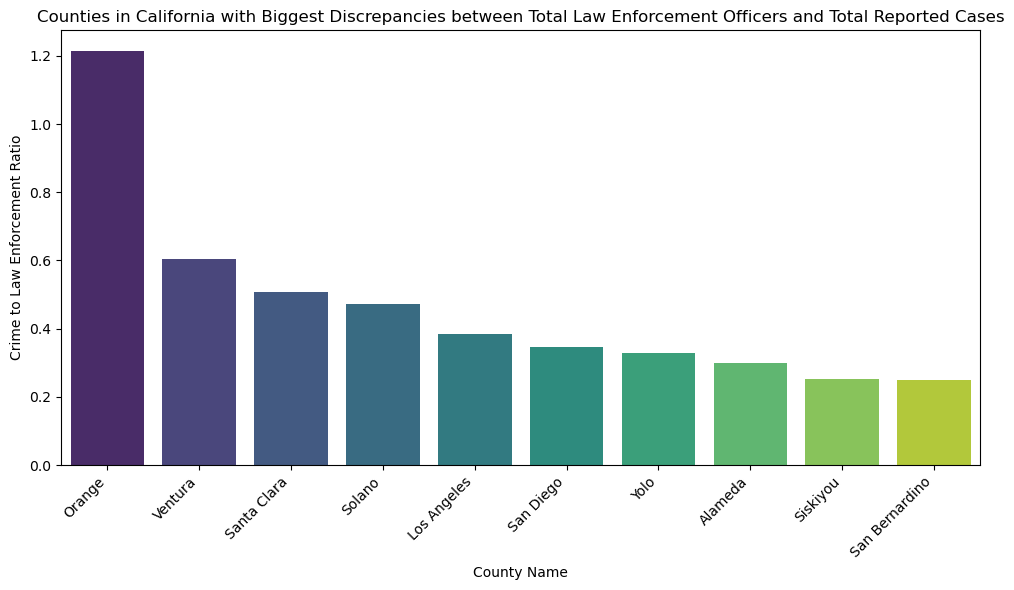

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(data=compare_data, x='County', y='Crime to Law Enforcement Ratio', palette='viridis')

plt.xlabel('County Name')
plt.ylabel('Crime to Law Enforcement Ratio')
plt.title('Counties in California with Biggest Discrepancies between Total Law Enforcement Officers and Total Reported Cases')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

 #### **Outcome 5**: What other factors may affect crime rates of a particular area? How significant are their impacts?

##### Outcome 5.1: Exploring Population's Effect on Crime Rates

<Axes: title={'center': ' Top 10 in Population to Reported Cases in Order of Reported Cases'}, xlabel='City'>

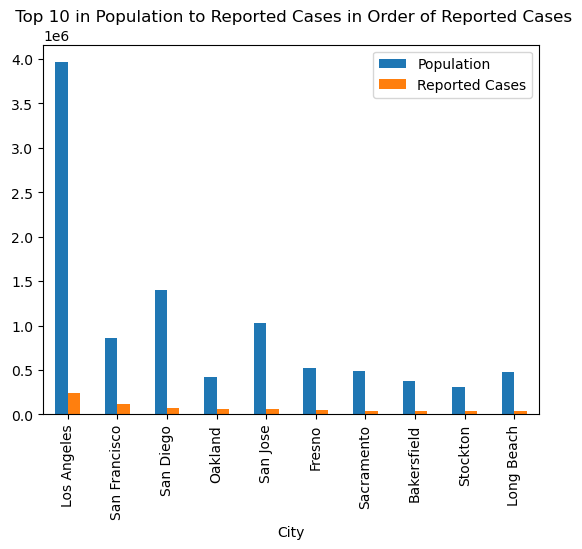

In [ ]:
data = crime_city.groupby('City').sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True).head(10)
data.plot(x='City', y=['Population','Reported Cases'], kind='bar', title = ' Top 10 in Population to Reported Cases in Order of Reported Cases')

<Axes: title={'center': 'Top 10 in Population to Reported Cases in Order of Population'}, xlabel='City'>

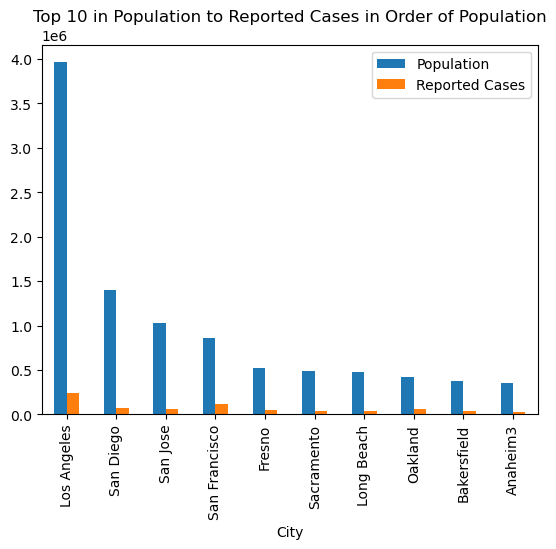

In [ ]:
data = crime_city.groupby('City').sum().reset_index().sort_values(by='Population',ascending=False,ignore_index=True).head(10)
data.plot(x='City', y=['Population','Reported Cases'], kind='bar', title = 'Top 10 in Population to Reported Cases in Order of Population')

 Both graphs above show that population is not directly proportional to the total crime/reported cases in an area. When sorted based on total reported cases and total population,
both show different picture as the top ten cities does not match. As a result, we'll need to sort the cities based on crime rate to truly see whether population does affect crime in California. To do this, we'll need to calculate the crime rates of each individual city beforehand, outputting the top ten, and comparing it with the graphs above. 

In [ ]:
crime_city['Crime Rate'] = crime_city['Reported Cases']/crime_city['Population']*100000 
# crime rate's formula is the amount of reported cases in an area divided by the population mulitplied by 100,000
sorted_city = crime_city.sort_values(by='Crime Rate', ascending=False)
pd.options.display.float_format = '{:.0f}'.format
print(sorted_city[['City','Crime Rate']].to_string(index=False))

                  City  Crime Rate
              Industry     1087379
               Vernon3      553043
             Sand City       88201
                Colma3       37492
           Emeryville3       37241
            Irwindale3       27076
              Commerce       20461
               Sonora3       17117
             Red Bluff       15870
             Oroville3       15385
     Santa Fe Springs3       15017
               Eureka3       14759
               Oakland       14641
           Signal Hill       14466
          Palm Springs       13982
         San Francisco       13861
          Pismo Beach3       13703
              Capitola       13459
            El Centro3       12884
           Santa Cruz3       12711
          Grass Valley       12179
        San Bernardino       12121
         Big Bear Lake       11711
               Modesto       11557
         Pleasant Hill       11289
              Stockton       11264
               Barstow       11203
              Lakepo

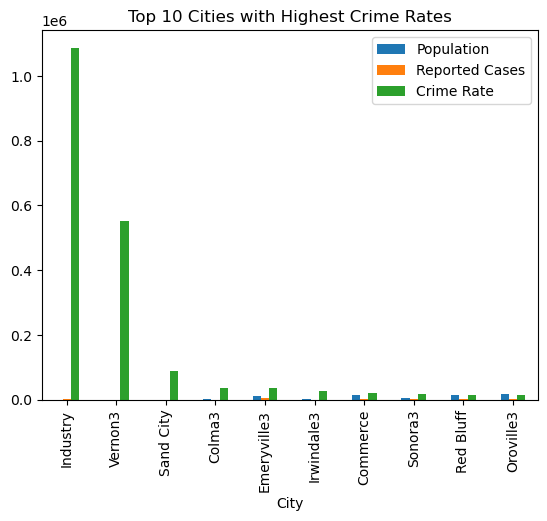

In [ ]:
data = sorted_city.head(10)
data.plot(x='City', y=['Population','Reported Cases','Crime Rate'], kind='bar', title = 'Top 10 Cities with Highest Crime Rates')
pd.options.display.float_format = '{:.0f}'.format

#### **Analysis shows that the cities with highest crime rates in California in 2015 are:**
1. Industry (1087379)
2. Vernon (553043)
3. Sand City (88201)
4. Colma (37492)
5. Emeryville (37241)
6. Irwindale (27076)
7. Commerce (20461)
8. Sonora (17117)
9. Red Bluff (15870)
10. Oroville (15385)

The graph above shows the top ten cities in California with the highest crime rates, where crime rate does not necessarily correspond to population. It can be deduced that while reported cases does grow proportionally with population, it isn't necessarily the key factor that affects crime rate. Cities like Industry and Vernon might have high crime rates due to other factors related to demographics such as economy, landscape, or more even though their population is low. 

##### Outcome 5.2: Metropolitan or Nonmetropolitan Crime Rates Comparison

In [92]:
county_sort = crime_county.groupby('Metropolitan/Nonmetropolitan').sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True)
print(county_sort)

  Metropolitan/Nonmetropolitan  Violent crime  \
0        Metropolitan Counties        22966.0   
1     Nonmetropolitan Counties         2028.0   

   Murder and nonnegligent manslaughter  Rape (revised definition)  Robbery  \
0                                 346.0                     1599.0   4488.0   
1                                  31.0                      247.0    170.0   

   Aggravated assault  Property crime  Burglary  Larceny-theft  \
0             16533.0         98678.0   29225.0        57078.0   
1              1580.0          6822.0    3155.0         3548.0   

   Motor vehicle theft   Arson  Reported Cases  
0              12375.0  1095.0        244383.0  
1                119.0    75.0         17775.0  


C:\Users\varic\AppData\Local\Temp\ipykernel_25208\2349730539.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  county_sort = crime_county.groupby('Metropolitan/Nonmetropolitan').sum().reset_index().sort_values(by='Reported Cases',ascending=False,ignore_index=True)


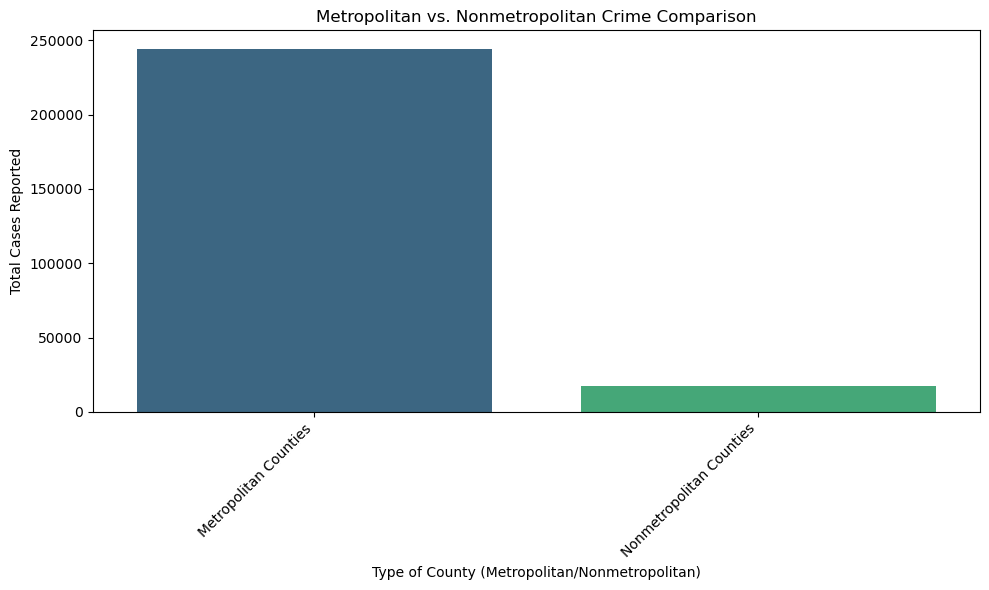

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(data=county_sort, x='Metropolitan/Nonmetropolitan', y='Reported Cases', palette='viridis')

plt.xlabel('Type of County (Metropolitan/Nonmetropolitan)')
plt.ylabel('Total Cases Reported')
plt.title('Metropolitan vs. Nonmetropolitan Crime Comparison')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

#### **2015 California Crime and Law Enforcement Data Analysis Final Results**
1. Areas with highest number of reported crimes: 
    - Agency: Highway Patrol
    - City: Los Angeles
    - County: Los Angeles
2. Property crime is the overall most frequently committed crime in California
3. Department of Parks and Recreation, Atherton, and Orange are the agencies, cities, and counties with the worst law enforcement officers to total reported cases ratio. 
4. Most dangerous cities (Los Angeles, San Fransisco, San Diego) ≠ cities with highest crime rates (Industry, Vernon, Sand City)
5. While on the bigger picture population may seem to affect crime rates, it does not. Instead, a county being metropolitan or nonmetropolitan does. 